In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [1]:
pip install pandas==1.5.3 seaborn==0.13.2

Note: you may need to restart the kernel to use updated packages.


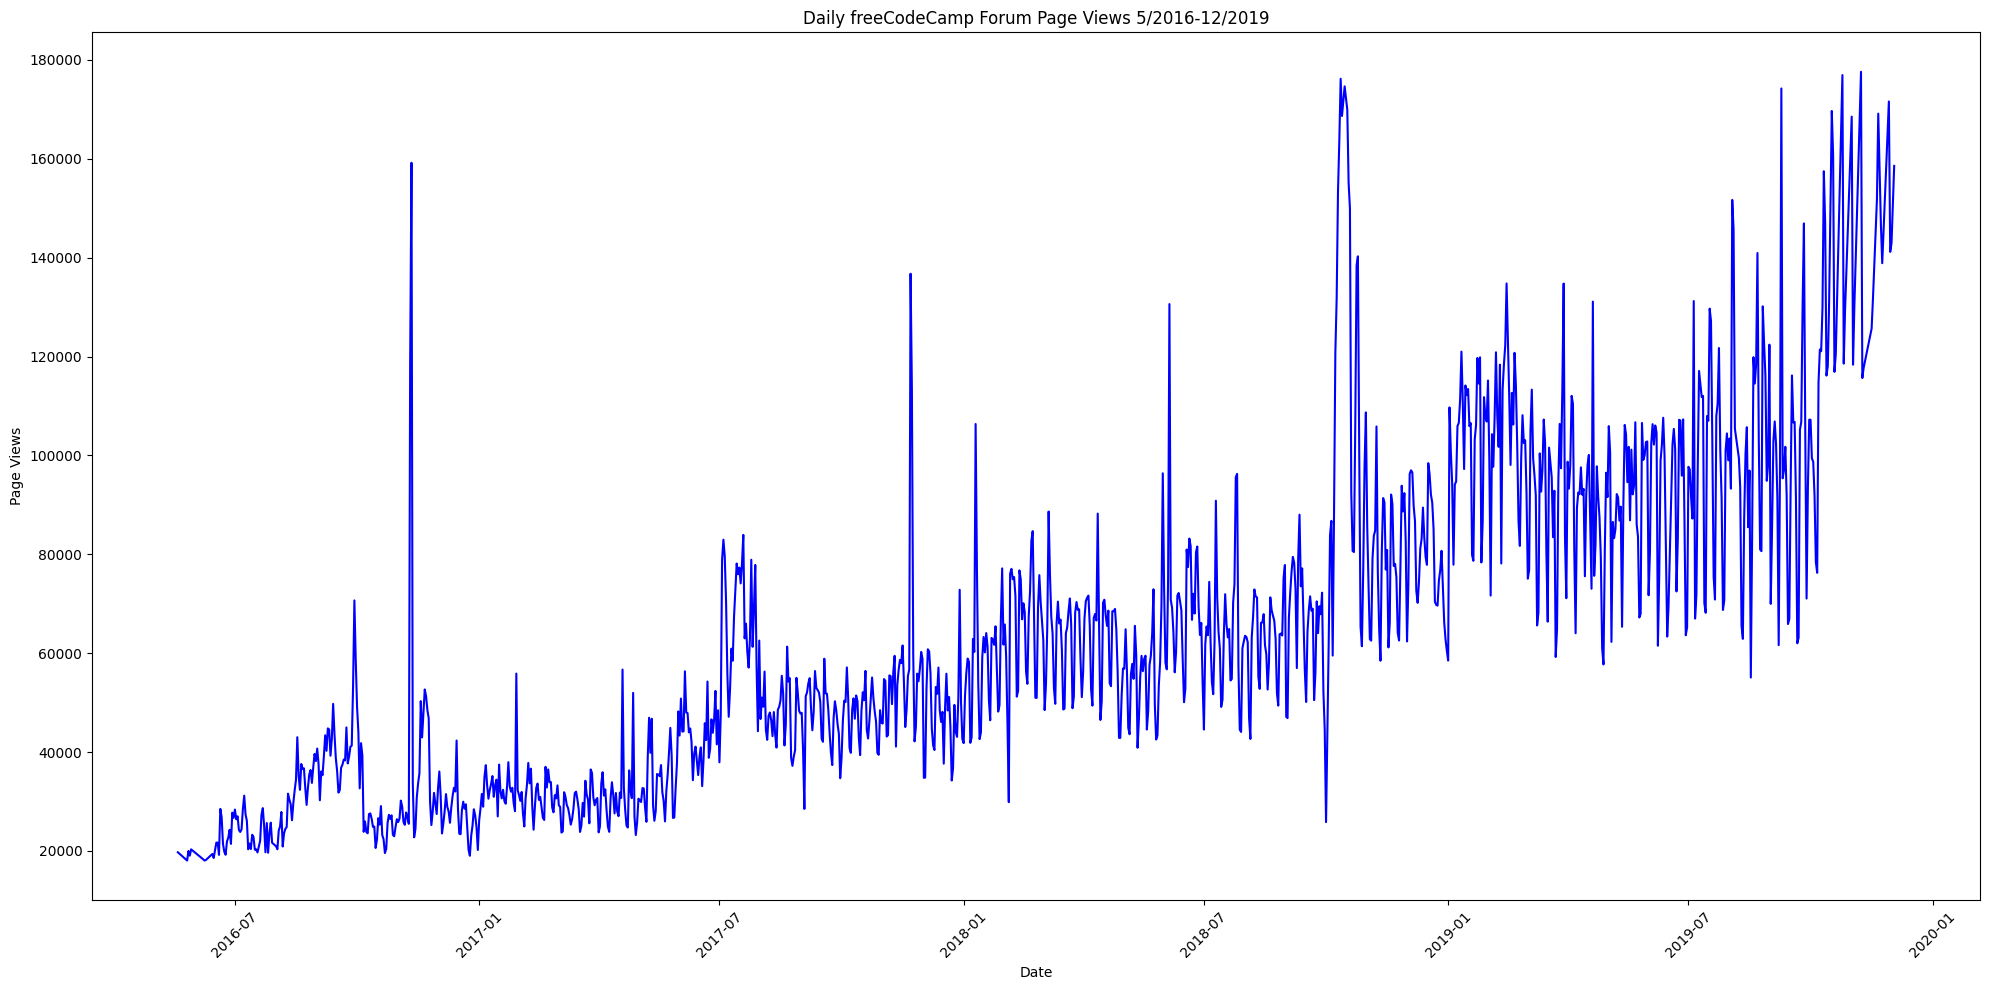

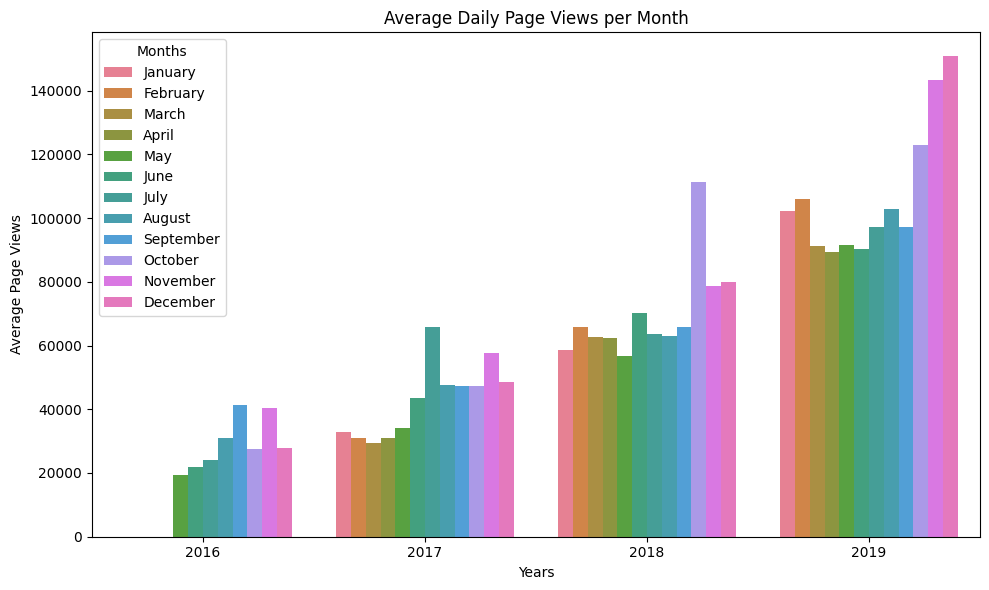

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
df = pd.read_csv("fcc-forum-pageviews.csv")

# Filtrar los valores atípicos
df = df[(df['value'] <= df['value'].quantile(0.975)) & (df['value'] >= df['value'].quantile(0.025))]

# Convertir la columna 'date' a formato de fecha
df['date'] = pd.to_datetime(df['date'])

# Función para el gráfico de líneas
def draw_line_plot():
    plt.figure(figsize=(20, 10))
    sns.lineplot(data=df, x="date", y="value", color='blue')
    plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    plt.xlabel('Date')
    plt.ylabel('Page Views')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('line_plot.png')
    plt.show()

# Función para el gráfico de barras
def draw_bar_plot():
    # Crear 'Year' y 'Month' en un solo paso
    df['Year'] = df['date'].dt.year
    df['Month'] = df['date'].dt.strftime('%B')  # Usar %B para obtener el nombre completo del mes

    monthly_avg = df.groupby(['Year', 'Month'])['value'].mean().reset_index()
    
    # Ordenar los meses
    months_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                    'July', 'August', 'September', 'October', 'November', 'December']
    monthly_avg['Month'] = pd.Categorical(monthly_avg['Month'], categories=months_order, ordered=True)

    monthly_avg.sort_values(['Year', 'Month'], inplace=True)  # Ordenar in-place

    plt.figure(figsize=(10, 6))
    sns.barplot(data=monthly_avg, x="Year", y="value", hue="Month")
    plt.title('Average Daily Page Views per Month')
    plt.xlabel('Years')
    plt.ylabel('Average Page Views')
    plt.legend(title='Months')
    plt.tight_layout()
    plt.savefig('bar_plot.png')
    plt.show()

# Dibujar los gráficos
draw_line_plot()
draw_bar_plot()





Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.



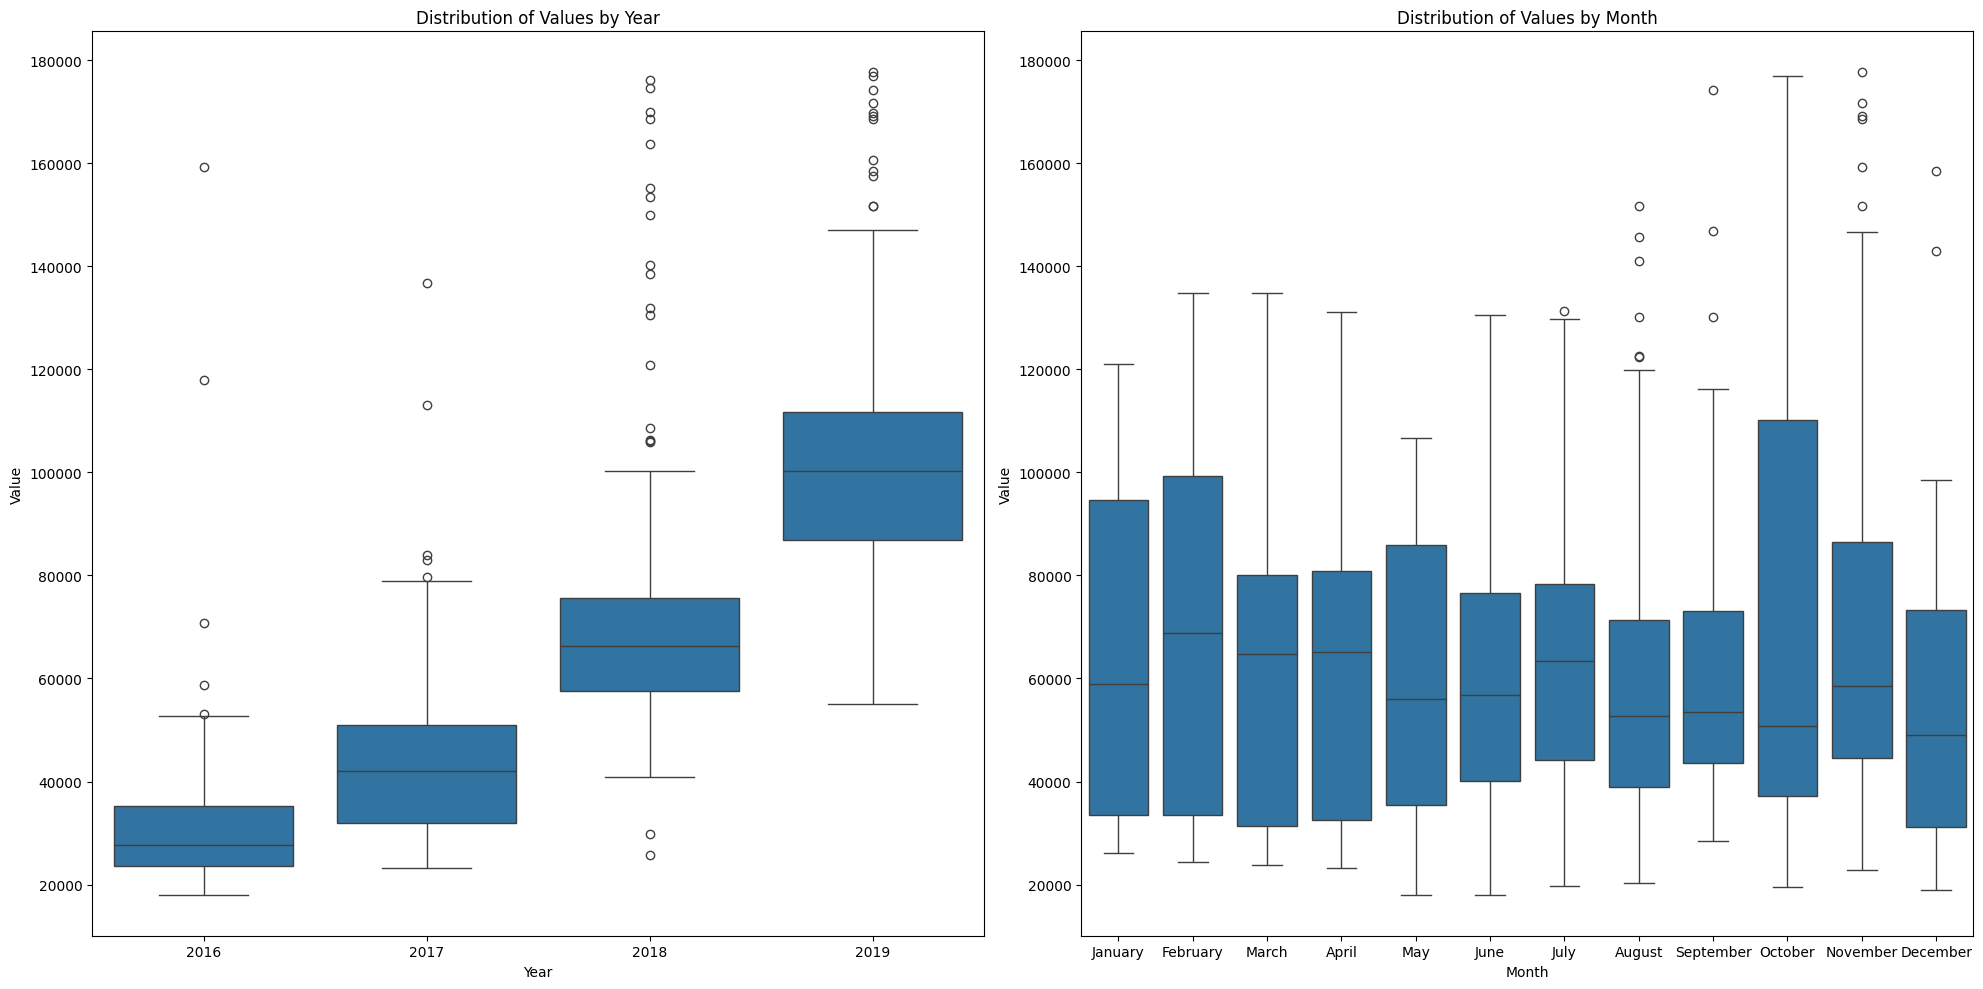

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

def draw_box_plot(df):
    # Extract year and month from the date
    df['Year'] = df['date'].dt.year
    df['Month'] = df['date'].dt.strftime('%B')
    
    # Set the figure size for two subplots
    plt.figure(figsize=(20, 10))
    
    # First subplot for yearly data
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df, x='Year', y='value')
    plt.title('Distribution of Values by Year')
    plt.xlabel('Year')
    plt.ylabel('Value')
    
    # Second subplot for monthly data
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, x='Month', y='value', 
                order=['January', 'February', 'March', 'April', 'May', 'June', 
                       'July', 'August', 'September', 'October', 'November', 'December'])
    plt.title('Distribution of Values by Month')
    plt.xlabel('Month')
    plt.ylabel('Value')
    
    # Adjust layout
    
    plt.tight_layout()
    
    # Show the plot
    plt.show()

# Call the function with your DataFrame
draw_box_plot(df)
